In [18]:
import os
import warnings
warnings.filterwarnings('ignore')

# Matplotlib setup for Jupyter
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import librosa
import librosa.display as lbd
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# Set paths for a sample pair (edit as needed)
REAL_DIR = 'data/real'
CLONED_DIR = 'data/cloned'

# Example: pick a speaker and file (edit these for your data)
# Get only directories (filter out .DS_Store and other files)
speaker_dirs = [d for d in os.listdir(REAL_DIR) 
                if os.path.isdir(os.path.join(REAL_DIR, d)) and not d.startswith('.')]
if not speaker_dirs:
    raise FileNotFoundError('No speaker directories found in data/real/')
speaker = speaker_dirs[0]
real_files = [f for f in os.listdir(os.path.join(REAL_DIR, speaker)) if f.endswith('.wav')]
if not real_files:
    raise FileNotFoundError('No real wav files found!')
real_file = real_files[0]
real_path = os.path.join(REAL_DIR, speaker, real_file)
cloned_path = os.path.join(CLONED_DIR, speaker, real_file)

# Load audio
y_real, sr_real = librosa.load(real_path, sr=None)
y_clone, sr_clone = librosa.load(cloned_path, sr=None)

# Resample if needed
if sr_real != sr_clone:
    y_clone = librosa.resample(y_clone, orig_sr=sr_clone, target_sr=sr_real)
    sr_clone = sr_real

# Pad shorter signal for overlay
min_len = min(len(y_real), len(y_clone))
y_real = y_real[:min_len]
y_clone = y_clone[:min_len]


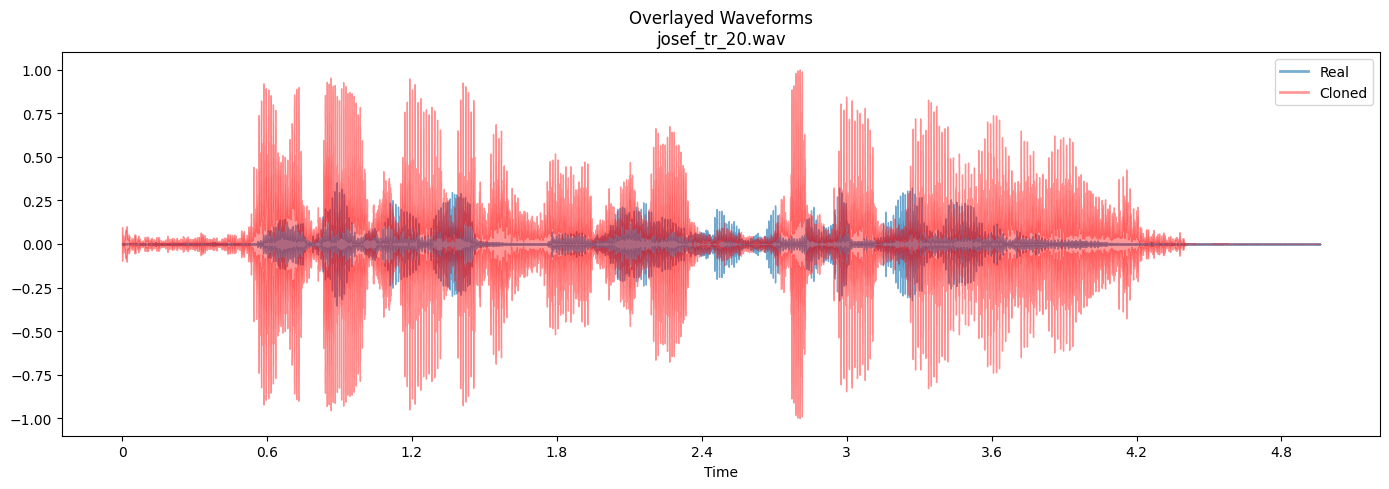

In [19]:
plt.figure(figsize=(14, 5))
ax = plt.gca()
lbd.waveshow(y_real, sr=sr_real, alpha=0.6, ax=ax, color='C0')
lbd.waveshow(y_clone, sr=sr_real, alpha=0.4, ax=ax, color='r')
ax.set_title(f'Overlayed Waveforms\n{real_file}')
handles = [
    Line2D([0], [0], color='C0', lw=2, alpha=0.6, label='Real'),
    Line2D([0], [0], color='r', lw=2, alpha=0.4, label='Cloned')
]
labels = ['Real', 'Cloned']
ax.legend(handles, labels)
plt.tight_layout()
plt.show()

In [ ]:
# Ruling the differences 
